0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.warn('ignore')

<ipython-input-26-d4498e671f26>:8: UserWarning: ignore
  warnings.warn('ignore')


In [27]:
from keras.datasets import cifar10

In [74]:
cifar10_class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [28]:
## Train-Test split
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [29]:
## Splitting the data into training, validation and test data and also scaling the input data
## Each of the pixel value ranges from 0 to 255. So we can divide the input features of the training, validation, and test data by 255 in order to scale it down between 0 and 1.
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

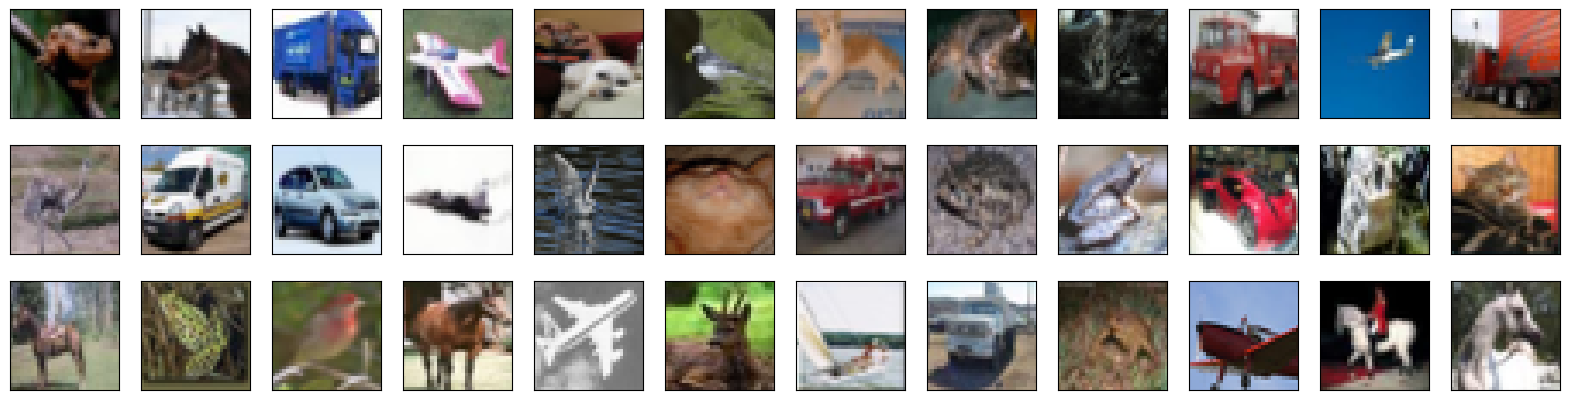

In [30]:
## Visualizing some of the images of the cifar10 dataset
figure = plt.figure(figsize=(20,5))
for i in range(36):
    ax = figure.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

## First layer of convolusion
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Second layer of convolusion
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Third layer of convolusion
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(400, activation='relu'))

model.add(Dropout(0.3))

tf.keras.layers.BatchNormalization()

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 64)         

In [32]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [33]:
checkpoint_path = 'Model_Ckeckpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, batch_size=64,  epochs=20, validation_data=(x_valid, y_valid), callbacks=[early_stopping_callback, checkpoint_callback], verbose=2, shuffle=True)

Epoch 1/20
704/704 - 55s - loss: 1.6506 - accuracy: 0.4039 - val_loss: 1.4092 - val_accuracy: 0.4878 - 55s/epoch - 79ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 - 53s - loss: 1.2293 - accuracy: 0.5620 - val_loss: 1.2708 - val_accuracy: 0.5406 - 53s/epoch - 76ms/step
Epoch 3/20
704/704 - 52s - loss: 1.0407 - accuracy: 0.6338 - val_loss: 1.0246 - val_accuracy: 0.6440 - 52s/epoch - 74ms/step
Epoch 4/20
704/704 - 52s - loss: 0.9174 - accuracy: 0.6801 - val_loss: 1.1067 - val_accuracy: 0.6202 - 52s/epoch - 74ms/step
Epoch 5/20
704/704 - 53s - loss: 0.8249 - accuracy: 0.7122 - val_loss: 0.9034 - val_accuracy: 0.6810 - 53s/epoch - 75ms/step
Epoch 6/20
704/704 - 51s - loss: 0.7487 - accuracy: 0.7382 - val_loss: 0.8820 - val_accuracy: 0.6944 - 51s/epoch - 72ms/step
Epoch 7/20
704/704 - 51s - loss: 0.6873 - accuracy: 0.7588 - val_loss: 0.8990 - val_accuracy: 0.6992 - 51s/epoch - 72ms/step
Epoch 8/20
704/704 - 51s - loss: 0.6304 - accuracy: 0.7814 - val_loss: 0.8203 - val_accuracy: 0.7204 - 51s/epoch - 72ms/step
Epoch 9/20
704/704 - 52s - loss: 0.5801 - accuracy: 0.7987 - val_loss: 0.8965 - val_accuracy: 0.6934 - 52s/epoch - 75ms/step
Epoch 10/20

In [36]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.650568,0.403933,1.409240,0.4878
1,1.229310,0.562022,1.270797,0.5406
2,1.040670,0.633844,1.024555,0.6440
3,0.917446,0.680111,1.106706,0.6202
4,0.824905,0.712156,0.903397,0.6810
5,0.748727,0.738244,0.882018,0.6944
6,0.687266,0.758778,0.898984,0.6992
7,0.630410,0.781422,0.820341,0.7204
8,0.580125,0.798689,0.896496,0.6934
9,0.537694,0.812556,1.005322,0.6522


<Axes: >

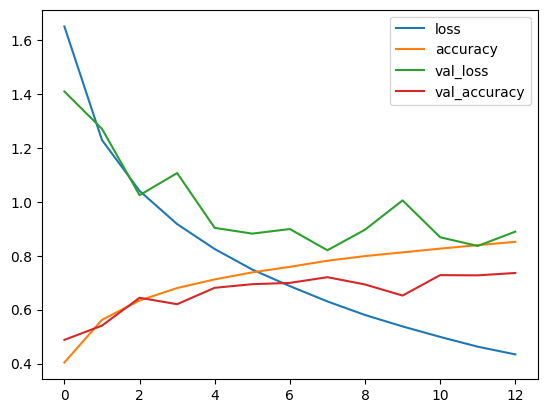

In [37]:
pd.DataFrame(history.history).plot()

In [92]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

In [93]:
score = checkpoint_model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2996 - accuracy: 1.0000


In [94]:
print('model accuracy =', score[1]*100)

model accuracy = 100.0


In [96]:
y_pred = checkpoint_model.predict(x_test)
y_pred.round(2) ## Rounding-off the probability to two digits

313/313 [==============================] - 4s 13ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.06, 0.  ],
       [0.  , 0.38, 0.  , ..., 0.  , 0.61, 0.  ],
       [0.06, 0.05, 0.01, ..., 0.  , 0.84, 0.04],
       ...,
       [0.  , 0.  , 0.04, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.04, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.98, 0.  , 0.  ]], dtype=float32)

In [97]:
y_pred

array([[2.7453511e-03, 1.8326906e-04, 1.4018411e-04, ..., 1.4559031e-04,
        6.4035080e-02, 1.1283721e-04],
       [1.7665678e-03, 3.8197064e-01, 1.8403027e-08, ..., 7.7973940e-11,
        6.1436319e-01, 1.8994287e-03],
       [5.5809114e-02, 4.9326885e-02, 6.1954777e-03, ..., 1.5074493e-03,
        8.3772790e-01, 3.6980346e-02],
       ...,
       [1.7879080e-06, 1.8147556e-09, 4.1825872e-02, ..., 2.6942301e-03,
        8.5533982e-05, 7.8123676e-08],
       [1.1983275e-02, 4.0148374e-02, 3.4742099e-03, ..., 1.3623456e-03,
        1.2849307e-03, 5.8890216e-04],
       [5.2604072e-08, 4.1570964e-08, 9.8073902e-04, ..., 9.7705585e-01,
        7.6858481e-10, 3.8522611e-08]], dtype=float32)

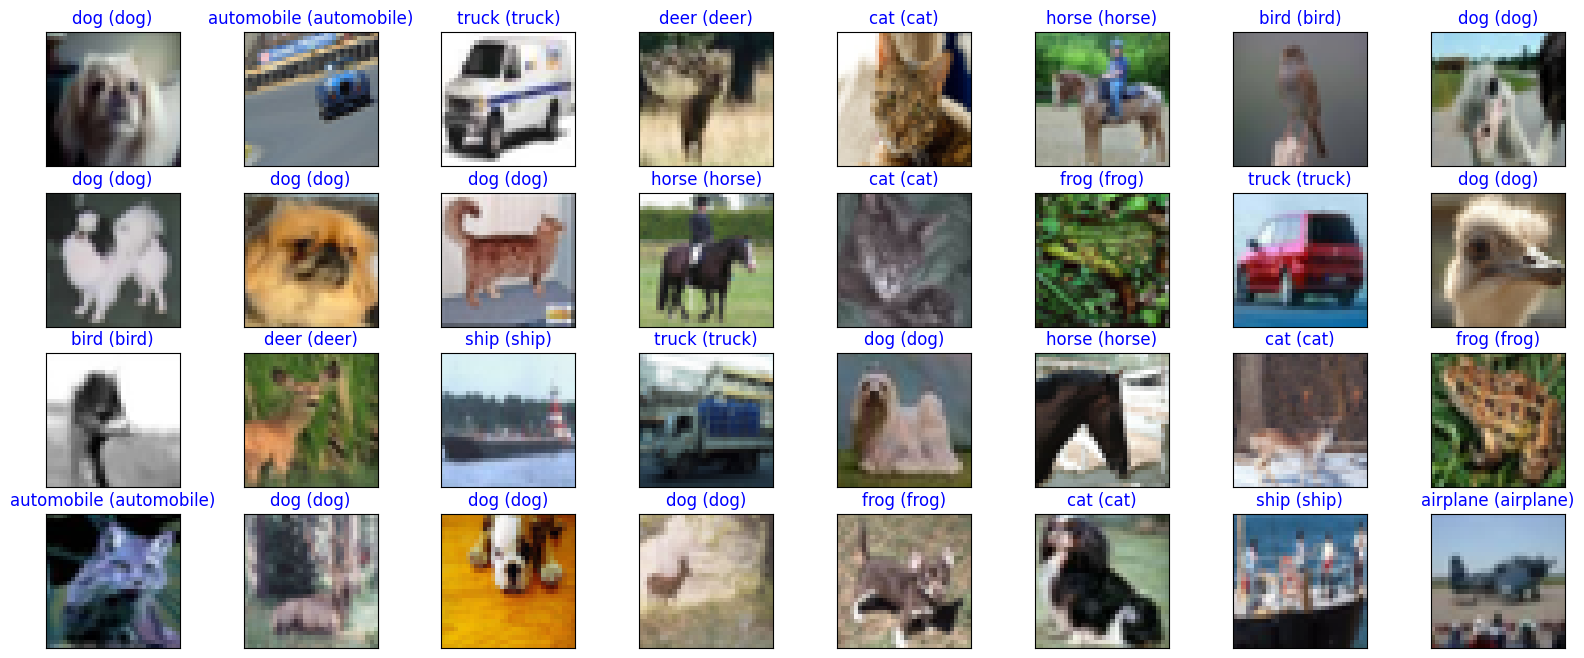

In [99]:
figure = plt.figure(figsize=(20,8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax = figure.add_subplot(4,8,i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_pred[idx])
  true_idx = y_test[idx]
  ax.set_title("{} ({})".format(cifar10_class_names[pred_idx], cifar10_class_names[true_idx]),
  color=("blue" if pred_idx == true_idx else "red"))